In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter  # 필요한 모듈 가져오기

plt.rc('font', family='NanumMyeongjo') # For Windows
print(plt.rcParams['font.family'])

['NanumMyeongjo']


In [95]:
station_df = pd.read_csv('제주특별자치도_버스노선현황.csv', encoding='cp949')

station_df.head()

,구분,노선명,운행구간,거리(km),1일운행횟수,최소배차간격시간,최대배차간격시간,운행대수 (평일),운행업체,비고,데이터기준일자,광역단체
0,간선,311.0,"한라수목원, 제주시, 탐라도서관, 제주시, 노형오거리, 제주시, 한라병원, 제주시,...",26.1,64.0,20.0,45.0,9.0,삼화여객,휴일감차,2022-12-31,제주시
1,간선,312.0,"한라수목원, 제주시, 탐라도서관, 제주시, 노형오거리, 제주시, 한라병원, 제주시,...",29.2,55.0,25.0,50.0,8.0,삼화여객,휴일감차,2022-12-31,제주시
2,간선,315.0,"수산, 제주시, 하귀, 제주시, 외도, 제주시, 월광로, 제주시, 백록초, 제주시,...",27.6,48.0,30.0,45.0,7.0,제주여객,없음,2022-12-31,제주시
3,간선,316.0,"번대, 제주시, 하귀, 제주시, 외도, 제주시, 오광로, 제주시, 백록초, 제주시,...",28.7,48.0,35.0,55.0,7.0,제주여객,없음,2022-12-31,제주시
4,간선,320.0,"수산, 제주시, 하귀, 제주시, 외도, 제주시, 도평, 제주시, 광평, 제주시, 한...",28.2,76.0,8.0,42.0,11.0,삼영교통,휴일감차,2022-12-31,제주시


In [96]:
station_df['광역단체'].unique()

array(['제주시', '서귀포시', nan], dtype=object)

In [97]:
jeju_df = station_df[station_df['광역단체'] == '제주시']
seogwipo_df = station_df[station_df['광역단체'] == '서귀포시']

# 제주시

In [98]:
# 최소배차간격 기준
# jeju_df.sort_values(by=['최소배차간격시간'], ascending=[False])
# [424, 423, 453, 454, 471]

# 평균 배차간격 기준
jeju_df['Average'] = jeju_df[['최소배차간격시간', '최대배차간격시간']].mean(axis=1)
jeju_df.sort_values(by=['Average'], ascending=[False])
# [423, 424, 446, 453, 447]


<ipython-input-98-e33c44cc1775>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeju_df['Average'] = jeju_df[['최소배차간격시간', '최대배차간격시간']].mean(axis=1)


,구분,노선명,운행구간,거리(km),1일운행횟수,최소배차간격시간,최대배차간격시간,운행대수 (평일),운행업체,비고,데이터기준일자,광역단체,Average
37,지선,423.0,"제주터미널, 제주시, 한국병원, 제주시, 동광양, 제주시, 인화초교, 제주시, 천수...",19.60,9.0,85.0,130.0,2.0,금남여객,없음,2022-12-31,제주시,107.5
38,지선,424.0,"제주터미널, 제주시, 한국병원, 제주시, 동광양, 제주시, 인화초교, 제주시, 천수...",19.60,9.0,85.0,130.0,2.0,금남여객,없음,2022-12-31,제주시,107.5
52,지선,446.0,"도평, 제주시, 이호동, 제주시, 백록초, 제주시, 신제주R, 제주시, 오라3동, ...",25.02,21.0,30.0,165.0,3.0,삼화여객,없음,2022-12-31,제주시,97.5
56,지선,453.0,"도두, 제주시, 제주제주민속오일시장, 제주시, 서중, 제주시, 삼무공원, 제주시, ...",15.60,10.0,85.0,100.0,1.0,동진여객,없음,2022-12-31,제주시,92.5
53,지선,447.0,"도평, 제주시, 이호동, 제주시, 어영마을, 제주시, 사대부고, 제주시, 관덕정, ...",22.14,27.0,40.0,140.0,3.0,삼화여객,없음,2022-12-31,제주시,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,간선,320.0,"수산, 제주시, 하귀, 제주시, 외도, 제주시, 도평, 제주시, 광평, 제주시, 한...",28.20,76.0,8.0,42.0,11.0,삼영교통,휴일감차,2022-12-31,제주시,25.0
68,지선,490.0,"제주대, 제주시, 첨단과학단지, 제주시, 제주대, 제주시",5.80,68.0,15.0,15.0,2.0,삼화여객,없음,2022-12-31,제주시,15.0
24,간선,360.0,"제주대, 제주시, 제주시청, 제주시, 터미널, 제주시, 제주도청, 제주시, 제원아파...",16.00,166.0,7.0,20.0,17.0,삼영교통,휴일감차,2022-12-31,제주시,13.5
25,간선,365.0,"제주대(영주고), 제주시, 제주시청, 제주시, 중앙로사거리, 제주시, 용담, 제주시...",18.80,183.0,6.0,17.0,21.0,삼영교통,휴일감차,2022-12-31,제주시,11.5


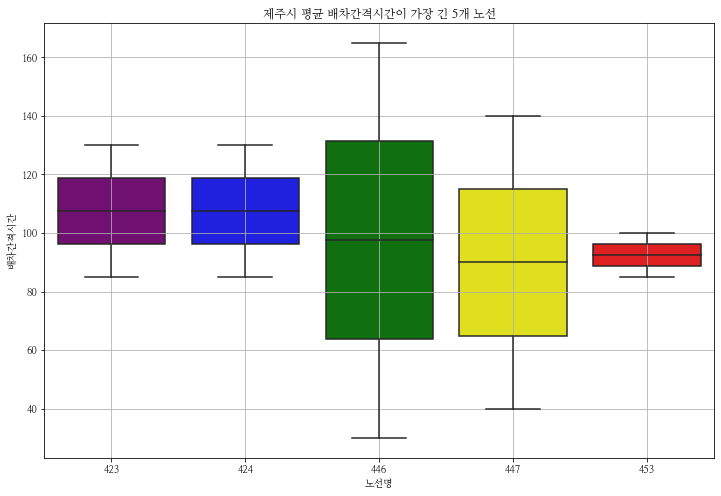

In [99]:
# 주어진 노선명들
# target_routes = [424, 423, 453, 454, 471]
target_routes = [423, 424, 446, 453, 447]

# 주어진 노선명에 해당하는 데이터 필터링
filtered_data = station_df[station_df['노선명'].isin(target_routes)]

# 새로운 DataFrame 생성
expanded_data = pd.DataFrame(columns=['노선명', '배차간격'])

# 각 노선에 대해 최소배차간격부터 최대배차간격까지의 값을 새로운 DataFrame에 추가
for route in target_routes:
    min_interval = filtered_data[filtered_data['노선명'] == route]['최소배차간격시간'].values[0]
    max_interval = filtered_data[filtered_data['노선명'] == route]['최대배차간격시간'].values[0]
    intervals = np.arange(min_interval, max_interval + 1)
    df = pd.DataFrame({'노선명': [route]*len(intervals), '배차간격': intervals})
    expanded_data = pd.concat([expanded_data, df], ignore_index=True)

# 시각화를 위해 새로운 DataFrame의 데이터로 상자그림 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='노선명', y='배차간격', data=expanded_data, palette=['purple', 'blue', 'green', 'yellow', 'red'])
plt.xlabel('노선명')
plt.ylabel('배차간격시간')
plt.title('제주시 평균 배차간격시간이 가장 긴 5개 노선')
plt.grid(True)
plt.show()

In [100]:
def track_to_list(track):
    return [i.strip()+", 제주시" for i in track.split("-")]

In [107]:
# [423, 424, 446, 453, 447] 순서
address_lists = []
for i in target_routes:
    tracks = jeju_df[jeju_df['노선명'] == i]['운행구간']
    tracks = tracks.str.split(", ").tolist()[0]
    tmp = []
    for j in range(len(tracks)//2):
        tmp.append(tracks[j*2] + ", " + tracks[j*2+1])
    address_lists.append(tmp)
address_lists

[['제주터미널, 제주시',
  '한국병원, 제주시',
  '동광양, 제주시',
  '인화초교, 제주시',
  '천수동, 제주시',
  '제주교육대학교, 제주시',
  '오현중고교, 제주시',
  '화북초교, 제주시',
  '화북남문, 제주시',
  '제주동중, 제주시',
  '화북주공입구, 제주시',
  '거로마을, 제주시',
  '황사평, 제주시',
  '영평하동, 제주시',
  '영평상동, 제주시',
  '신성여중고, 제주시',
  '제주여중고, 제주시',
  '중앙여고, 제주시',
  '법원, 제주시',
  '시청, 제주시',
  '제주터미널, 제주시'],
 ['제주터미널, 제주시',
  '한국병원, 제주시',
  '동광양, 제주시',
  '인화초교, 제주시',
  '천수동, 제주시',
  '제주교육대학교, 제주시',
  '오현중고교, 제주시',
  '화북초교, 제주시',
  '화북남문, 제주시',
  '제주동중, 제주시',
  '화북주공입구, 제주시',
  '거로마을, 제주시',
  '황사평, 제주시',
  '영평하동, 제주시',
  '영평상동, 제주시',
  '신성여중고, 제주시',
  '제주여중고, 제주시',
  '중앙여고, 제주시',
  '법원, 제주시',
  '시청, 제주시',
  '제주터미널, 제주시'],
 ['도평, 제주시',
  '이호동, 제주시',
  '백록초, 제주시',
  '신제주R, 제주시',
  '오라3동, 제주시',
  '용담, 제주시',
  '중앙로, 제주시',
  '시청, 제주시',
  '제주대/월평, 제주시'],
 ['도두, 제주시',
  '제주제주민속오일시장, 제주시',
  '서중, 제주시',
  '삼무공원, 제주시',
  '도청, 제주시',
  '사대부고, 제주시',
  '용담레포츠공원, 제주시',
  '어영마을, 제주시',
  '도두, 제주시'],
 ['도평, 제주시',
  '이호동, 제주시',
  '어영마을, 제주시',
  '사대부고, 제주시',
  '관덕정, 제주시',
  '중앙로, 제주시',
  '시청, 제주시'

### 제주시 5개 노선 시각화

In [108]:
import folium
from geopy.geocoders import Nominatim

# 주소 리스트와 선 색상

# 각 선에 대한 색상
colors = ['red', 'orange', 'green', 'blue', 'purple']

# geolocator 객체 생성
geolocator = Nominatim(user_agent="my_geocoder")

# 맵 생성
map_jeju = folium.Map(location=[33.5, 126.5], zoom_start=11)

# 주소 리스트 별로 선 그리기
for idx, address_list in enumerate(address_lists):
    route_coordinates = []
    for place in address_list:
        location = geolocator.geocode(place)
        if location:
            route_coordinates.append([location.latitude, location.longitude])
    if len(route_coordinates) > 1:
        folium.PolyLine(locations=route_coordinates, color=colors[idx], weight=2.5, opacity=1).add_to(map_jeju)

# 지도 출력
map_jeju


### 평균 배차시간 가장 긴 5개 노선에서 겹치는 정류장

In [112]:
combined_list = []
for sublist in address_lists:
    combined_list.extend(sublist)

# 중복되는 값을 찾기
duplicates = set([x for x in combined_list if combined_list.count(x) > 1])

print("중복되는 값들:", duplicates)

중복되는 값들: {'화북주공입구, 제주시', '한국병원, 제주시', '제주교육대학교, 제주시', '화북남문, 제주시', '중앙여고, 제주시', '중앙로, 제주시', '도평, 제주시', '오현중고교, 제주시', '거로마을, 제주시', '영평상동, 제주시', '동광양, 제주시', '이호동, 제주시', '사대부고, 제주시', '인화초교, 제주시', '시청, 제주시', '제주터미널, 제주시', '도두, 제주시', '어영마을, 제주시', '제주여중고, 제주시', '제주동중, 제주시', '화북초교, 제주시', '황사평, 제주시', '법원, 제주시', '영평하동, 제주시', '신성여중고, 제주시', '천수동, 제주시'}


In [116]:
# 한번도 중복되지 않는 정류장
no_duplicates = set(combined_list) - duplicates

In [117]:
print(no_duplicates)

{'용담레포츠공원, 제주시', '제주대/월평, 제주시', '제주대학교, 제주시', '제주제주민속오일시장, 제주시', '신제주R, 제주시', '삼무공원, 제주시', '백록초, 제주시', '서중, 제주시', '관덕정, 제주시', '도청, 제주시', '용담, 제주시', '오라3동, 제주시'}


In [113]:
# 중복되는 값의 개수를 세는 딕셔너리 생성
count_dict = {}
for item in combined_list:
    if item in count_dict:
        count_dict[item] += 1
    else:
        count_dict[item] = 1

# 3개 이상 중복되는 값을 찾기
three_or_more_duplicates = [key for key, value in count_dict.items() if value >= 3]

print("3개 이상 중복되는 값들:", three_or_more_duplicates)


3개 이상 중복되는 값들: ['제주터미널, 제주시', '시청, 제주시']


### 제주시. 평균 배차시간 가장 긴 5개 노선 중 한 노선만 지나가는 정류장

In [119]:
geolocator = Nominatim(user_agent="my_geocoder")

# 맵 생성
map_duplicated = folium.Map(location=[33.5, 126.5], zoom_start=11)

# 중복x 값들에 대해 선과 마커 추가
prev_location = None
for location in no_duplicates:
    geocode = geolocator.geocode(location)
    if geocode:
        current_location = [geocode.latitude, geocode.longitude]
        # 마커 추가
        folium.Marker(current_location, popup=location).add_to(map_duplicated)
        prev_location = current_location

# 지도 출력
map_duplicated

# 서귀포시


In [121]:
# 최소배차간격 기준
# seogwipo_df.sort_values(by=['최소배차간격시간'], ascending=[False])
# [627, 622, 532, 612, 521]

# 평균 배차간격 기준
seogwipo_df['Average'] = seogwipo_df[['최소배차간격시간', '최대배차간격시간']].mean(axis=1)
seogwipo_df.sort_values(by=['Average'], ascending=[False])
# [627, 622, 633, 690, 612]


<ipython-input-121-b45f0bb09d0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seogwipo_df['Average'] = seogwipo_df[['최소배차간격시간', '최대배차간격시간']].mean(axis=1)


,구분,노선명,운행구간,거리(km),1일운행횟수,최소배차간격시간,최대배차간격시간,운행대수 (평일),운행업체,비고,데이터기준일자,광역단체,Average
82,지선,627.0,"외돌개, 서귀포시, 중앙R, 서귀포시, 효돈, 서귀포시, 신례초, 서귀포시, 공업단...",20.40,10.0,165.0,220.0,1.0,서귀공영,없음,2022-12-31,서귀포시,192.5
78,지선,622.0,"삼매봉, 서귀포시, 서귀포여고, 서귀포시, 수모루, 서귀포시, 서귀포여중, 서귀포시...",21.50,12.0,165.0,195.0,1.0,서귀공영,없음,2022-12-31,서귀포시,180.0
84,지선,633.0,"삼성여고, 서귀포시, 세기아파트, 서귀포시, 동문, 서귀포시, 1호광장, 서귀포시,...",24.40,20.0,20.0,160.0,2.0,금남여객,없음,2022-12-31,서귀포시,90.0
94,지선,690.0,"평안전문요양원, 서귀포시, 오일시장, 서귀포시, 중앙로터리, 서귀포시, 서귀여고, ...",29.70,16.0,57.0,120.0,2.0,서귀공영,없음,2022-12-31,서귀포시,88.5
75,지선,612.0,"천지연폭포, 서귀포시, 중앙R, 서귀포시, 동홍사거리, 서귀포시, 비석거리, 서귀포...",23.57,24.0,60.0,110.0,4.0,금남여객,없음,2022-12-31,서귀포시,85.0
73,간선,532.0,"화순, 서귀포시, 안덕계곡, 서귀포시, 감산, 서귀포시, 창천, 서귀포시, 예래, ...",30.84,22.0,75.0,90.0,3.0,서귀포운수,없음,2022-12-31,서귀포시,82.5
74,지선,611.0,"천지연폭포, 서귀포시, 서귀포여고, 서귀포시, 서귀포여중, 서귀포시, 동홍사거리, ...",25.06,24.0,50.0,100.0,4.0,금남여객,없음,2022-12-31,서귀포시,75.0
92,지선,652.0,"회수, 서귀포시, 중문우체국, 서귀포시, 강정초, 서귀포시, 법환초, 서귀포시, 수...",16.57,20.0,25.0,125.0,5.0,금남여객,없음,2022-12-31,서귀포시,75.0
91,지선,651.0,"회수, 서귀포시, 중문우체국, 서귀포시, 중문고, 서귀포시, 강정초, 서귀포시, 법...",16.57,38.0,25.0,125.0,5.0,금남여객,없음,2022-12-31,서귀포시,75.0
89,지선,644.0,"농업기술원, 서귀포시, 신시가지, 서귀포시, 서홍새마을금고, 서귀포시, 서귀북초, ...",29.74,16.0,45.0,105.0,4.0,금남여객,없음,2022-12-31,서귀포시,75.0


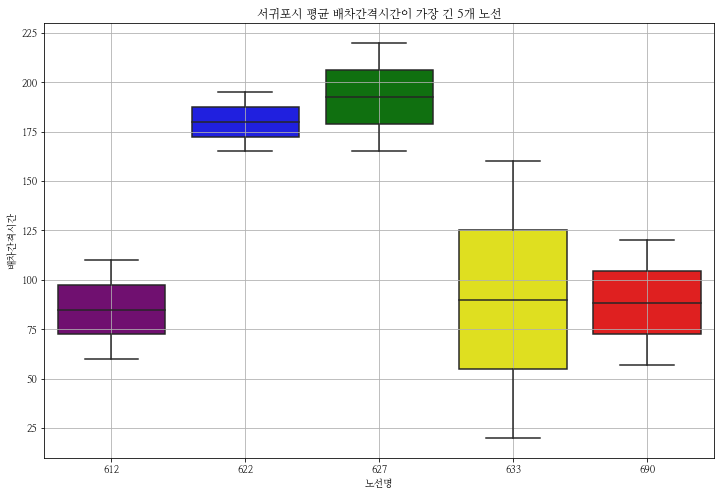

In [122]:
# 주어진 노선명들
# target_routes = [627, 622, 532, 612, 521]
target_routes = [627, 622, 633, 690, 612]

# 주어진 노선명에 해당하는 데이터 필터링
filtered_data = station_df[station_df['노선명'].isin(target_routes)]

# 새로운 DataFrame 생성
expanded_data = pd.DataFrame(columns=['노선명', '배차간격'])

# 각 노선에 대해 최소배차간격부터 최대배차간격까지의 값을 새로운 DataFrame에 추가
for route in target_routes:
    min_interval = filtered_data[filtered_data['노선명'] == route]['최소배차간격시간'].values[0]
    max_interval = filtered_data[filtered_data['노선명'] == route]['최대배차간격시간'].values[0]
    intervals = np.arange(min_interval, max_interval + 1)
    df = pd.DataFrame({'노선명': [route]*len(intervals), '배차간격': intervals})
    expanded_data = pd.concat([expanded_data, df], ignore_index=True)

# 시각화를 위해 새로운 DataFrame의 데이터로 상자그림 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='노선명', y='배차간격', data=expanded_data, palette=['purple', 'blue', 'green', 'yellow', 'red'])
plt.xlabel('노선명')
plt.ylabel('배차간격시간')
plt.title('서귀포시 평균 배차간격시간이 가장 긴 5개 노선')
plt.grid(True)
plt.show()

In [125]:
# [627, 622, 633, 690, 612] 순서
address_lists = []
for i in target_routes:
    tracks = seogwipo_df[seogwipo_df['노선명'] == i]['운행구간']
    tracks = tracks.str.split(", ").tolist()[0]
    tmp = []
    for j in range(len(tracks)//2):
        tmp.append(tracks[j*2] + ", " + tracks[j*2+1])
    address_lists.append(tmp)
address_lists

[['외돌개, 서귀포시', '중앙R, 서귀포시', '효돈, 서귀포시', '신례초, 서귀포시', '공업단지입구, 서귀포시'],
 ['삼매봉, 서귀포시',
  '서귀포여고, 서귀포시',
  '수모루, 서귀포시',
  '서귀포여중, 서귀포시',
  '세기아파트, 서귀포시',
  '신례리, 서귀포시',
  '하례입구, 서귀포시'],
 ['삼성여고, 서귀포시',
  '세기아파트, 서귀포시',
  '동문, 서귀포시',
  '1호광장, 서귀포시',
  '서귀포여중/고, 서귀포시',
  '버스터미널, 서귀포시',
  '대천동주민센터, 서귀포시',
  '중문고, 서귀포시',
  '색달, 서귀포시',
  '하례, 서귀포시'],
 ['평안전문요양원, 서귀포시',
  '오일시장, 서귀포시',
  '중앙로터리, 서귀포시',
  '서귀여고, 서귀포시',
  '법환초, 서귀포시',
  '하원초, 서귀포시',
  '중문고, 서귀포시',
  '중문우체국, 서귀포시',
  '중문관광단지, 서귀포시',
  '큰솔동산, 서귀포시',
  '대포포구, 서귀포시'],
 ['천지연폭포, 서귀포시',
  '중앙R, 서귀포시',
  '동홍사거리, 서귀포시',
  '비석거리, 서귀포시',
  '흙통, 서귀포시',
  '토평마을회관, 서귀포시',
  '예비군훈련장, 서귀포시',
  '공업단지, 서귀포시',
  '법호촌, 서귀포시',
  '충혼묘지, 서귀포시']]

### 서귀포시 5개 노선 시각화

In [128]:
import folium
from geopy.geocoders import Nominatim

# 주소 리스트와 선 색상

# 각 선에 대한 색상
colors = ['red', 'orange', 'green', 'blue', 'purple']

# geolocator 객체 생성
geolocator = Nominatim(user_agent="my_geocoder")

# 맵 생성
map_jeju = folium.Map(location=[33.2529607630432, 126.56101770909784], zoom_start=11)

# 주소 리스트 별로 선 그리기
for idx, address_list in enumerate(address_lists):
    route_coordinates = []
    for place in address_list:
        location = geolocator.geocode(place)
        if location:
            route_coordinates.append([location.latitude, location.longitude])
    if len(route_coordinates) > 1:
        folium.PolyLine(locations=route_coordinates, color=colors[idx], weight=2.5, opacity=1).add_to(map_jeju)

# 지도 출력
map_jeju


In [129]:
combined_list = []
for sublist in address_lists:
    combined_list.extend(sublist)

# 중복되는 값을 찾기
duplicates = set([x for x in combined_list if combined_list.count(x) > 1])

print("중복되는 값들:", duplicates)

중복되는 값들: {'중문고, 서귀포시', '세기아파트, 서귀포시', '중앙R, 서귀포시'}


In [130]:
no_duplicates = set(combined_list) - duplicates

In [131]:
print(no_duplicates)

{'동문, 서귀포시', '대포포구, 서귀포시', '하례입구, 서귀포시', '중문우체국, 서귀포시', '천지연폭포, 서귀포시', '큰솔동산, 서귀포시', '삼매봉, 서귀포시', '법호촌, 서귀포시', '서귀포여중, 서귀포시', '중앙로터리, 서귀포시', '공업단지입구, 서귀포시', '대천동주민센터, 서귀포시', '예비군훈련장, 서귀포시', '공업단지, 서귀포시', '1호광장, 서귀포시', '색달, 서귀포시', '신례초, 서귀포시', '토평마을회관, 서귀포시', '동홍사거리, 서귀포시', '삼성여고, 서귀포시', '비석거리, 서귀포시', '효돈, 서귀포시', '법환초, 서귀포시', '버스터미널, 서귀포시', '하원초, 서귀포시', '서귀포여중/고, 서귀포시', '평안전문요양원, 서귀포시', '오일시장, 서귀포시', '중문관광단지, 서귀포시', '신례리, 서귀포시', '수모루, 서귀포시', '서귀포여고, 서귀포시', '흙통, 서귀포시', '충혼묘지, 서귀포시', '외돌개, 서귀포시', '서귀여고, 서귀포시', '하례, 서귀포시'}


### 서귀포시. 평균 배차시간 가장 긴 5개 노선 중 한 노선만 지나가는 정류장

In [132]:
geolocator = Nominatim(user_agent="my_geocoder")

# 맵 생성
map_duplicated = folium.Map(location=[33.2529607630432, 126.56101770909784], zoom_start=11)

# 중복x 값들에 대해 선과 마커 추가
prev_location = None
for location in no_duplicates:
    geocode = geolocator.geocode(location)
    if geocode:
        current_location = [geocode.latitude, geocode.longitude]
        # 마커 추가
        folium.Marker(current_location, popup=location).add_to(map_duplicated)
        prev_location = current_location

# 지도 출력
map_duplicated